In [19]:
set.seed(1234)
install.packages("kknn")
library(tidyverse)
library(tidymodels)
library(kknn)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



###  PREDICTING AGE OF ATHLETES BASED OFF OF OLYMPICS DATA

*INTRODUCTION*

Every four years, nations gather the best of their best, their peak athletes to compete in the Summer Olympics, competing in the highest echelon of their respective sports. However, maintaining their spot at the top for many years is no easy feat. As such, we are trying to predict an athlete’s age based on multiple factors. We will try to determine whether factors such as an athlete’s: height, weight, and the number of medals they have won have any correlation to their age. The dataset we will be using has gathered Olympic data for 120 years! From all the way back in 1896, to 2016. It contains the names of athletes and their statistics, such as their height, weight, team, medals won, years they have participated etc. For our purposes however, we will only be using data from the year 2016 as to make sure athletes who make appearances in other Olympics will not be double counted. We will also only use data from one sport (Athletics column) as our predictors will have different effects on the age as we go across multiple sports due to the different skill sets required for each sport.

Link to dataset: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results




### Methods & Results:
Loading Data:
We will load our data, which is stored in a git hub repository, 
the function read_csv as the data set have comma separated values.
We will inspect the data set works by checking the head and the tail 
of the data set. We have decided to name the tibble read_athlete.

In [ ]:
read_athlete<-read_csv("https://raw.githubusercontent.com/Mahekbhardwaj/DSCI-100-group38/main/athlete_events_full.csv")
head(read_athlete)
tail(read_athlete)

#### Choosing a sport: 
To decide on one sport, we will group the dataset by Sport
and summarize how many times each sport comes up. The sport with the highest
count will be our chosen sport. In this case it will be Athletics. We have done
this in order to maximize that amount of data we are able to use

In [21]:
sports<-read_athlete|> group_by(Sport) |> summarize(count=n()) 
head(sports)
tail(sports)

Sport,count
<chr>,<int>
Alpine Skiing,3493
Alpinism,7
Archery,830
Art Competitions,1445
Athletics,14678
Badminton,455


Sport,count
<chr>,<int>
Triathlon,205
Tug-Of-War,62
Volleyball,1149
Water Polo,1472
Weightlifting,1355
Wrestling,2552


#### Filtering only “Athletics” from Sport and "2016" from Year in the read_athlete dataset. 
We will name this new tibble athlete.

In [22]:
athlete<-read_athlete|> filter(Sport=="Athletics",Year==2016)
athlete<-na.omit(athlete)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1561,Mobolade Abimbola Ajomale,M,20,180,62,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
1682,Morolake Akinosun,F,22,163,61,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold
2695,Nia Sifaatihii Ali,F,27,170,65,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,Silver
4782,Hirooki Arai,M,28,180,62,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,Bronze
5542,"Geraldina Rachel ""Dina"" Asher-Smith",F,20,164,55,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Bronze


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
46275,Christoph Harting,M,26,207,120,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Discus Throw,Gold
46542,Natasha Monique Hastings,F,30,173,68,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 400 metres Relay,Gold
46861,Akeem Haynes,M,24,170,73,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,Bronze
47578,"Jeffrey ""Jeff"" Henderson",M,27,183,86,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,Gold
47736,Desiree Latifah N. Henry,F,20,171,64,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Bronze
48858,Sophie Hitchon,F,25,170,75,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,Bronze


#### We will now group “athlete” by five columns: ID, Name, Age, Height, and Weight.
The reason we group here by these variables is so that we can count how many times 
a given athlete has made an appearance in any Olympics event. We will name this tibble olymp_num.

In [23]:
olymp_num<- athlete|> group_by(ID,Name,Age,Height,Weight) |> summarize(olympics_events_attended=n()) 
olymp_num

`summarise()` has grouped output by 'ID', 'Name', 'Age', 'Height'. You can
override using the `.groups` argument.


ID,Name,Age,Height,Weight,olympics_events_attended
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<int>
846,Valerie Kasanita Adams-Vili (-Price),31,193,120,1
1561,Mobolade Abimbola Ajomale,20,180,62,1
1682,Morolake Akinosun,22,163,61,1
2695,Nia Sifaatihii Ali,27,170,65,1
4782,Hirooki Arai,28,180,62,1
5542,"Geraldina Rachel ""Dina"" Asher-Smith",20,164,55,1
5561,Nickel Ashmeade,26,183,77,1
6204,Almaz Ayana Eba,24,166,47,2
6912,Kemar Bailey-Cole,24,193,84,1


#### For visualization, we will plot the number of Olympic events an athlete has attended vs their age. 
As we can see from the plot, we can see no discernable relationship between 
Olympics appearances and age.

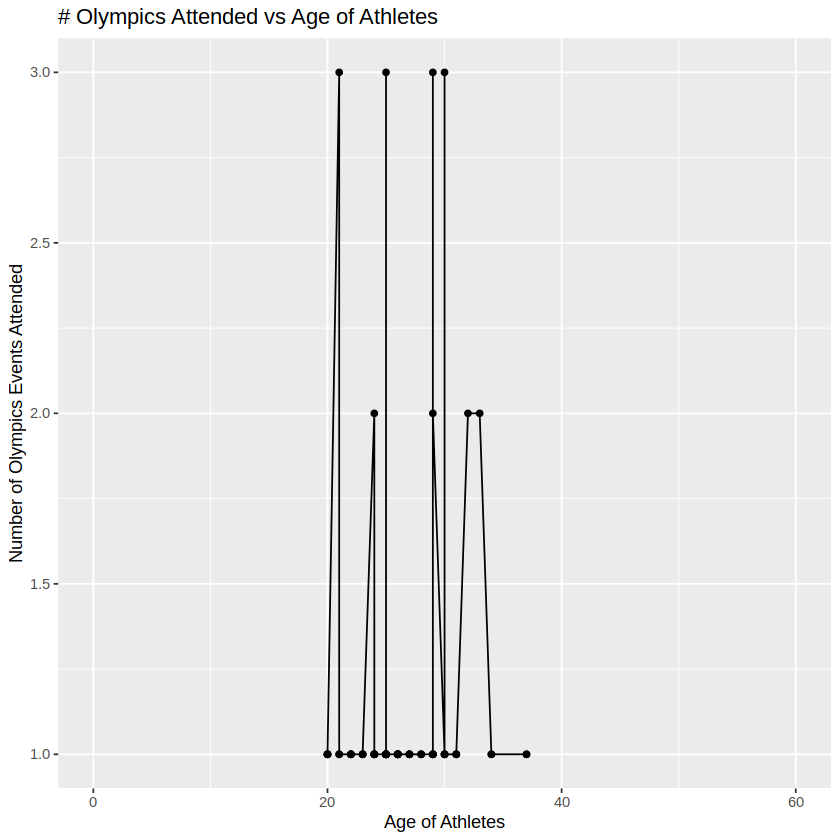

In [42]:
event_age_plot<-olymp_num|>
                ggplot(aes(y=olympics_events_attended,x=Age)) +
                geom_point()+ geom_line()+ xlim(0,60)+
                labs(y="Number of Olympics Events Attended",x="Age of Athletes") +
                 ggtitle("Number Olympics Attended vs Age of Athletes")
event_age_plot

#### Below is the code for number of medals won per athlete.
We index NA and non-NA values in the Medal column to 0 and 1 respectively.

In [25]:
athlete$Medal <- ifelse(!is.na(athlete$Medal), 1, athlete$Medal)
head(athlete)
tail(athlete)

ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
846,Valerie Kasanita Adams-Vili (-Price),F,31,193,120,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,1
1561,Mobolade Abimbola Ajomale,M,20,180,62,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,1
1682,Morolake Akinosun,F,22,163,61,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1
2695,Nia Sifaatihii Ali,F,27,170,65,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres Hurdles,1
4782,Hirooki Arai,M,28,180,62,Japan,JPN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 50 kilometres Walk,1
5542,"Geraldina Rachel ""Dina"" Asher-Smith",F,20,164,55,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1


ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
46275,Christoph Harting,M,26,207,120,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Discus Throw,1
46542,Natasha Monique Hastings,F,30,173,68,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 400 metres Relay,1
46861,Akeem Haynes,M,24,170,73,Canada,CAN,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 100 metres Relay,1
47578,"Jeffrey ""Jeff"" Henderson",M,27,183,86,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Long Jump,1
47736,Desiree Latifah N. Henry,F,20,171,64,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,1
48858,Sophie Hitchon,F,25,170,75,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Hammer Throw,1


#### We apply the n_distinct column to the Medals column. 
This ensures that athletes who have won multiple times and thus will show up in repeat rows will only show up in one
row with their total medals won in the column medalcount.

In [26]:
athlete_average<- athlete|> group_by(ID,Age,Height,Weight)|> summarize(medalcount = n_distinct(Medal,na.rm = TRUE)) 
head(athlete_average)
tail(athlete_average)

`summarise()` has grouped output by 'ID', 'Age', 'Height'. You can override
using the `.groups` argument.


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
846,31,193,120,1
1561,20,180,62,1
1682,22,163,61,1
2695,27,170,65,1
4782,28,180,62,1
5542,20,164,55,1


ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<int>
46275,26,207,120,1
46542,30,173,68,1
46861,24,170,73,1
47578,27,183,86,1
47736,20,171,64,1
48858,25,170,75,1


#### Exploratory analysis- creating a table to find the average number of medals won by each age of athelete
converting medal col to int type

In [38]:
athlete$Medal <- as.integer(athlete$Medal)
athlete_medal<-athlete_average|>
                group_by(Age)|>
                summarize(meanmedalcount=mean(medalcount))
head(athlete_medal)
tail(athlete_medal)

Age,meanmedalcount
<dbl>,<dbl>
20,1
21,1
22,1
23,1
24,1
25,1


Age,meanmedalcount
<dbl>,<dbl>
30,1
31,1
32,1
33,1
34,1
37,1


#### Looking at plots for height vs age and weight vs age
This is done in order to see if there is a discernible relationship between weight, height and age. However, wee see that both the plots do not depict a relationship between the variables distinctly.

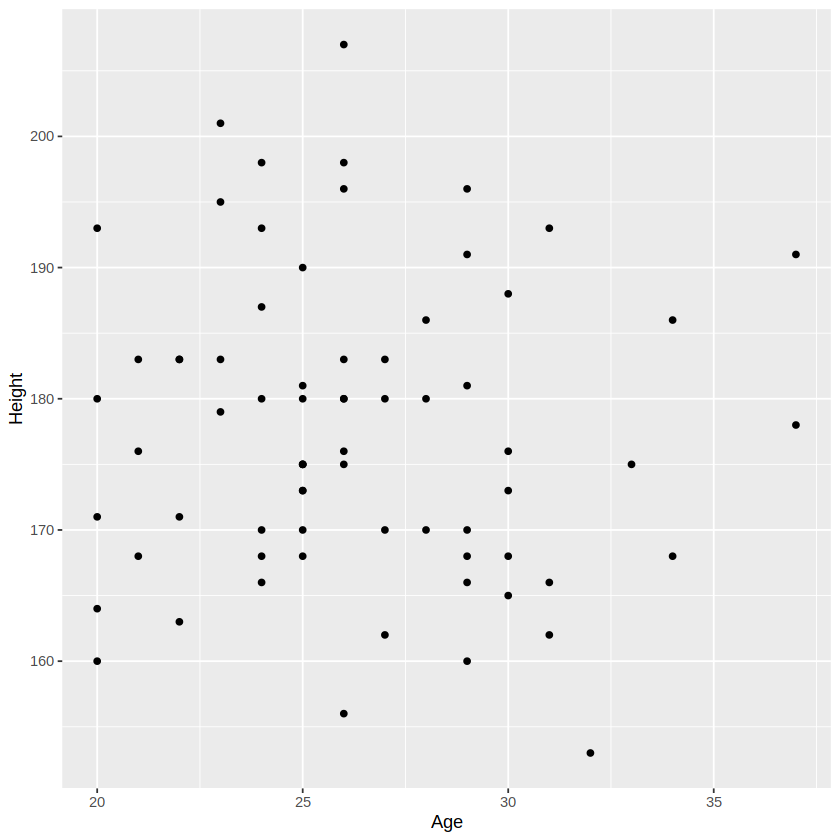

In [39]:
age_height_plot<-athlete_average|>
                ggplot(aes(y=Height,x=Age)) +
                geom_point()+ 
                labs(y="Height of Athletes",x="Age of Athletes") +
                 ggtitle("Height of Athletes vs Age")
age_height_plot 

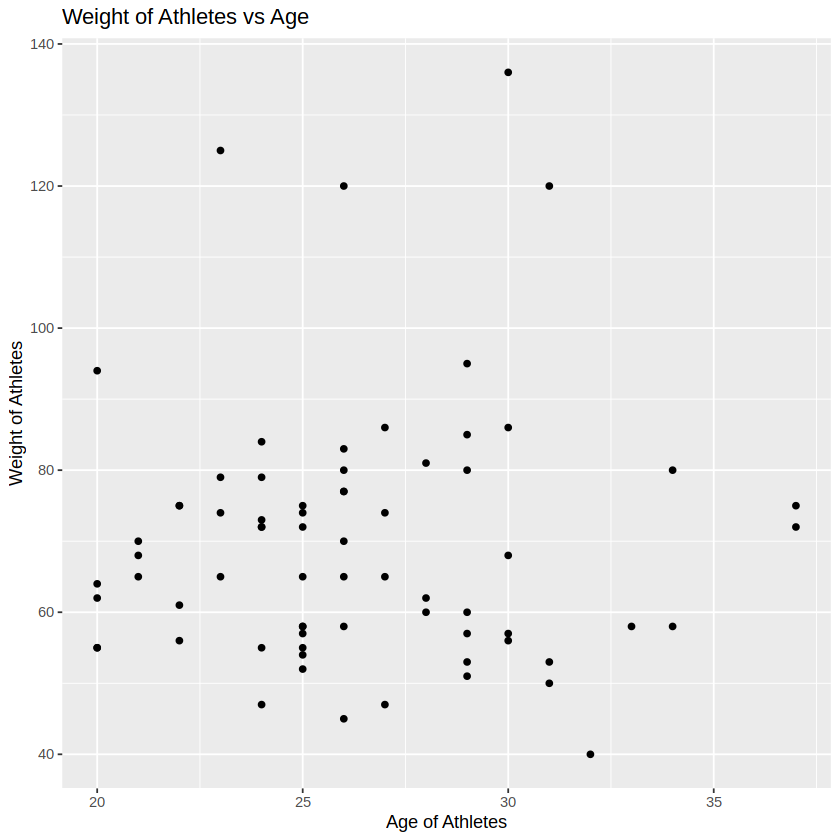

In [41]:
age_weight_plot<-athlete_average|>
                ggplot(aes(y=Weight,x=Age)) +
                geom_point()+ 
                labs(y="Weight of Athletes",x="Age of Athletes") +
                ggtitle("Weight of Athletes vs Age")
age_weight_plot

#### Now that the exploratory analysis is complete, we will start the K-Nearest Neighbors regression analysis. 
We split our data into two: a training and testing 
set with a proportion of 0.75. Our strata set to Age. We name our training and testing
sets athlete_train and athlete_test respectively.


In [32]:
mutate(athlete_average,Age=as_factor(Age))
athlete_split <- initial_split(athlete_average, prop = 0.75, strata = Age)
athlete_train <- training(athlete_split)
athlete_test <- testing(athlete_split)

ID,Age,Height,Weight,medalcount
<dbl>,<fct>,<dbl>,<dbl>,<int>
846,31,193,120,1
1561,20,180,62,1
1682,22,163,61,1
2695,27,170,65,1
4782,28,180,62,1
5542,20,164,55,1
5561,26,183,77,1
6204,24,166,47,1
6912,24,193,84,1


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 3 breaks instead.”


#### We will tune our engine to find the best value for k using the cross-validation method. 
We also choose our predictors for this model. We will predict Age based on Height, Weight,
and medalcount. We must also scale and center our data

In [33]:
ath_recipe <- recipe(Age ~ Height,Weight,medalcount, data = athlete_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

ath_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
                              set_engine("kknn") |>
                              set_mode("regression")

ath_vfold <- vfold_cv(athlete_train, v = 5, strata = Age)

ath_wkflw <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec)

ath_wkflw

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
• Stratification will use 2 breaks instead.”


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


#### We will test our training data with k values ranging from 1 to 40. 
This will be done by making a tibble called gridvals and plugging it into the function tune_grid(). We will also collect the metrics and filter the results by "rmse" such that we can see the table that displays the data throughout all values of k.

In [34]:
gridvals <- tibble(neighbors = seq(from = 1, to = 40))

ath_results <- ath_wkflw |>
  tune_grid(resamples = ath_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

ath_results

! Fold1: preprocessor 1/1, model 1/1: 40 samples were requested but there were 40 rows in the data. 35 will be...

! Fold2: preprocessor 1/1, model 1/1: 40 samples were requested but there were 40 rows in the data. 35 will be...

! Fold3: preprocessor 1/1, model 1/1: 40 samples were requested but there were 41 rows in the data. 36 will be...

! Fold4: preprocessor 1/1, model 1/1: 40 samples were requested but there were 41 rows in the data. 36 will be...

! Fold5: preprocessor 1/1, model 1/1: 40 samples were requested but there were 42 rows in the data. 37 will be...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,5.042467,5,0.3988604,Preprocessor1_Model01
2,rmse,standard,4.945363,5,0.5250791,Preprocessor1_Model02
3,rmse,standard,4.506362,5,0.7082486,Preprocessor1_Model03
4,rmse,standard,4.708288,5,0.5514576,Preprocessor1_Model04
5,rmse,standard,4.379320,5,0.5630204,Preprocessor1_Model05
6,rmse,standard,4.159964,5,0.4662033,Preprocessor1_Model06
7,rmse,standard,4.049928,5,0.4692632,Preprocessor1_Model07
8,rmse,standard,4.003312,5,0.4810312,Preprocessor1_Model08
9,rmse,standard,4.005678,5,0.4504740,Preprocessor1_Model09


#### We will create a plot of the Mean vs the k Neighbors value. 
Using the elbow method discussed in class, we can determine that k = 6 is the best value as any further values of k will only lead to diminishing returns.

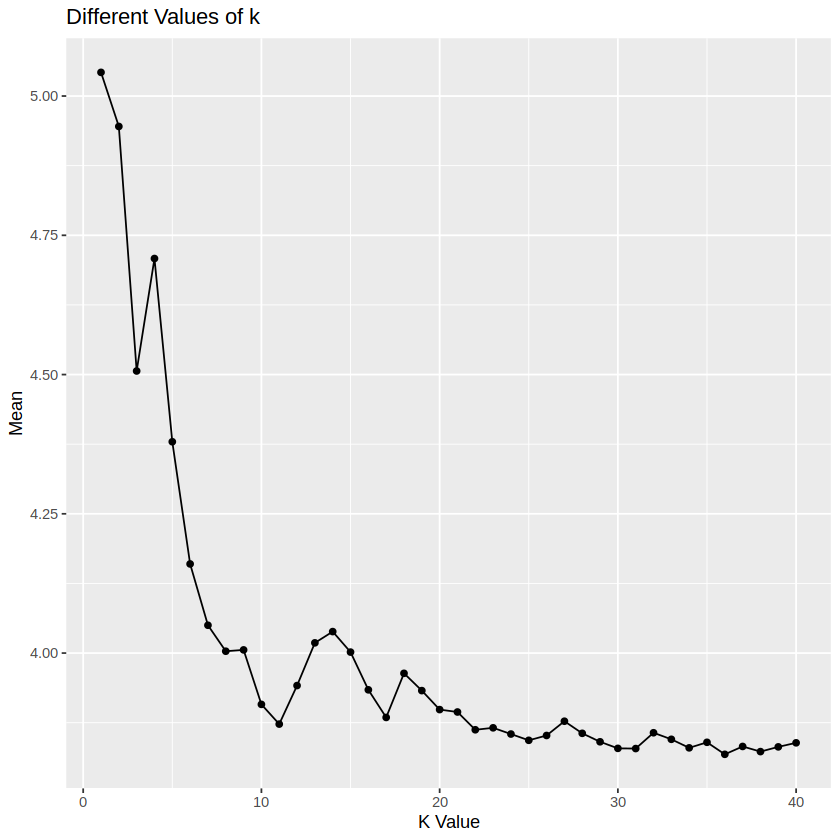

In [40]:
mean_neighbor_plot<-ath_results|>
                ggplot(aes(y=mean,x=neighbors)) +
                geom_point()+ geom_line()+
                labs(y="Mean",x="K Value") +
                ggtitle("Different Values of k")
    
mean_neighbor_plot 

#### According to the graph, the optimal value for k should be 6. 
We will now test our model on the testing data set. 

In [36]:
ath_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
  set_engine("kknn") |>
  set_mode("regression")

ath_fit <- workflow() |>
  add_recipe(ath_recipe) |>
  add_model(ath_spec) |>
  fit(data = athlete_train)

ath_summary <- ath_fit |>
  predict(athlete_test) |>
  bind_cols(athlete_test) |>
  metrics(truth = Age, estimate = .pred) |>
  filter(.metric == 'rmse')

ath_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.16807


#### Predicting using test dataset

In [37]:
ath_predictions <- predict(ath_fit, athlete_test) |>
  bind_cols(athlete_test)
ath_predictions

.pred,ID,Age,Height,Weight,medalcount
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
26.16667,1561,20,180,62,1
24.16667,2695,27,170,65,1
26.16667,5542,20,164,55,1
24.66667,15460,24,198,79,1
25.50000,17300,25,175,55,1
26.33333,17755,34,168,58,1
25.50000,20133,25,175,57,1
26.33333,25807,29,168,51,1
26.16667,27488,26,180,58,1


#### Looking at error metrics. 
We can see that our rmse is a value of 4.168. This is a relatively high value, suggesting the model did not predict as best as it could.

In [20]:
ath_predictions |>
  metrics(truth =Age, estimate =.pred) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,4.168069939
rsq,standard,0.003422919
mae,standard,3.026315789


### Discussion: 

After our analysis, we have found the ages of the athletes based on their height, weight, and the number of medals they’ve won. Moreover, we further illustrated the relationships that each of these factors has regarding age. In the graph, Olympics Attended vs Age of Athletes, we can observe there is a non-linear relationship that does not seem to display much importance. Also, using the following plots, Height of Athletes vs Age and Weight of Athlete vs Age, we can infer there isn’t a significant relationship between these factors and age due to the following: the points don’t meaningfully increase or decrease, it has weak strength as the points are very scattered, and it’s non-linear. In addition, using the K-Nearest Neighbors regression analysis, we have predicted age based on the previous variables above. However, through our error metrics, we can concur our model did not perform as effectively as expected. Our outcome is not quite what we expected to find, as we assumed our predictors or at least one of our predictors, would have a distinct/important correlation with age. This impacted our model’s efficacy in the regression analysis and led to a relatively high RMSE value. Our findings open up new questions but simultaneously answer a portion of our previous questions. Now that we are aware of the trivial relationships age has with height, weight, and the number of medals won, the following questions arise: are there any factors or variables that have a notable relationship concerning age at all? Do our findings allude to the idea that age is a fairly minor factor in winning in the Olympics?


### References:
Relevant Literature:
Berkowitz, B. and Galocha, A.(2021) Olympians are probably older — and younger — than you think. The Washington Post. https://www.washingtonpost.com/sports/olympics/2021/07/31/oldest-youngest-olympians/


Australian Research Council (ARC) (No Date). Peak performance age in sport: the typical Olympian is getting older. Australian Government Australian Research Council 
https://www.arc.gov.au/news-publications/media/research-highlights/peak-performance-age-sport-typical-olympian-getting-older
